In [1]:
#Importing all the libraries 
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
#Loading the data
ListingsBrief = pd.read_csv("/Users/SinnerMan/Desktop/Final Project/Final-Project-/listingsbrief.csv",encoding = 'utf-8')


In [2]:
#Loading the data
ListingsFull = pd.read_csv("/Users/SinnerMan/Desktop/Final Project/Final-Project-/listingsfull.csv",encoding = 'utf-8')

C:\Users\SinnerMan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ListingsBrief

In [ ]:
ListingsFull

In [3]:
#Listing the original dataset
ListingsFull=ListingsFull.set_index('id')

In [ ]:
ListingsFull

In [ ]:
ListingsFull.dtypes

In [ ]:
ListingsFull

In [ ]:
#Checking the statistics of the columns
ListingsFull.describe().transpose()

In [4]:
#Creating another dataframe to work on
Listings1=ListingsFull

In [ ]:
Listings1

In [5]:
#Converting price to a float
Listings1['price'] = Listings1['price'].str.replace('$', '')
Listings1['price'] = Listings1['price'].str.replace(',', '').astype('float64')

In [6]:
#Based on the above correlations and a sense test, we select the follwing features for our models
Listings1.head()
selected_columns = [
                'id',
                'host_response_rate',
                'host_is_superhost',
                'zipcode',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'bed_type',
                'amenities',
                'price',
                'guests_included',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value'
]

Listings1.drop( 
    [key for key in Listings1.keys() if key not in selected_columns] ,
    axis=1, 
    inplace=True)

In [ ]:
Listings1

In [7]:
#Since amenities is a textual feature, and we know longer the amenities means more the amenities which should be directly correlated to the price. So calculating the length of the amenities
Listings1.loc[:,'amenities_length'] = Listings1['amenities'].str.len()

In [ ]:
Listings1

In [8]:
#Dropping the original amenities column
Listings1 = Listings1.drop(['amenities'], 1)

In [ ]:
Listings1

In [ ]:
## DEVIATIONZZZ

In [9]:
#Converting the true/false values to binary 0/1
Listings1['host_is_superhost'].replace('t',1, inplace=True)
Listings1['host_is_superhost'].replace('f',0, inplace=True)

In [10]:
#Converting acceptance/response percentages to numbers
Listings1['host_response_rate'] = Listings1['host_response_rate'].replace('%','',regex=True).astype('float64')/100.00

In [ ]:
Listings1

Text(0, 0.5, 'Frequency')

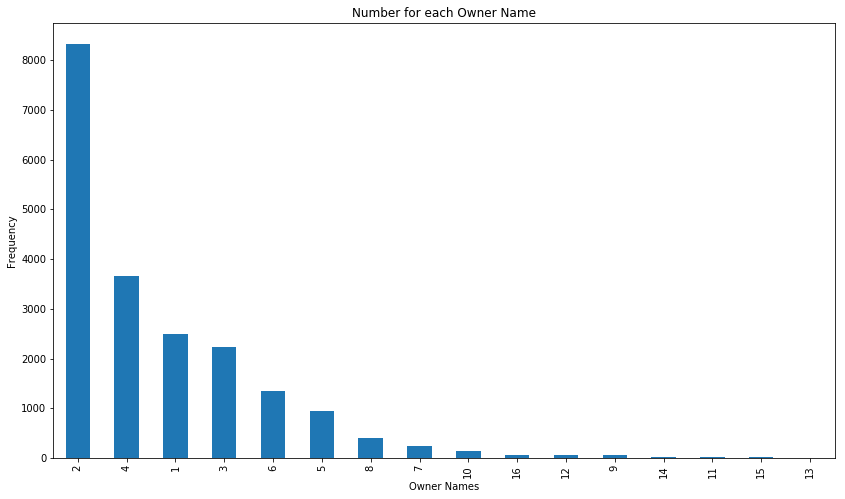

In [11]:
ax = Listings1['accommodates'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

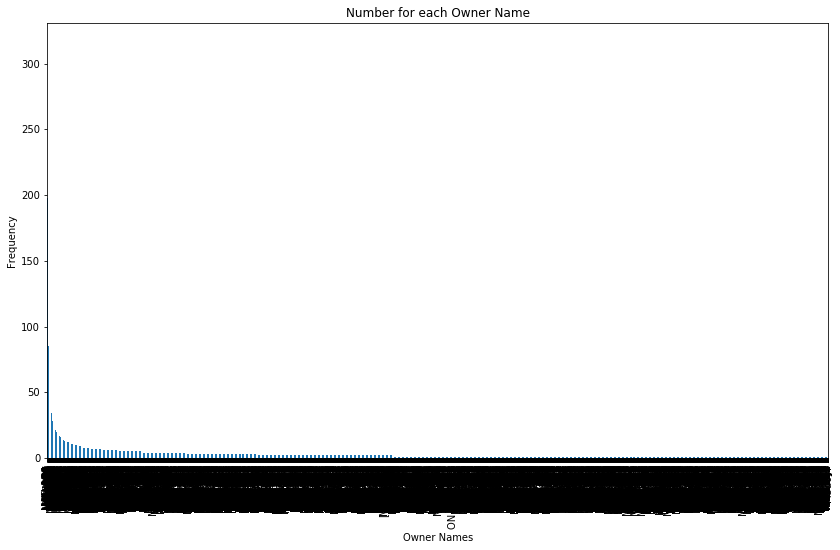

In [12]:
ax = Listings1['zipcode'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")

month_jan[feature_cols].sum().sort_values(ascending=0)[:10].plot(kind='bar')

In [ ]:
#Recoding property_type values 
def recode(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value

Listings1['property_type'] = Listings1['property_type'].apply(recode)

In [ ]:
#Recoding bed_type values
def recode(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

Listings1['bed_type'] = Listings1['bed_type'].apply(recode)

In [ ]:
Listings1

In [ ]:
#Filling the empty values in the columns
#listings_final['bathrooms'].fillna(method='ffill', inplace=True)
#listings_final['bedrooms'].fillna(method='ffill', inplace=True)
#listings_final['beds'].fillna(method='ffill', inplace=True)
#listings_final['host_is_superhost'].fillna(value=0,inplace=True)
#listings_final['host_response_rate'].fillna(value=0,inplace=True)

In [ ]:
Listings1

In [ ]:
Listings1.isna().sum()

In [ ]:
#Creating distribution charts for all the numbered features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = Listings1.select_dtypes(include=numerics)
numdf = numdf.dropna(axis=0, how='any')
numdf_variables = list(numdf)

graphs = len(numdf_variables)-1

position = []
for i in range(6):
    for j in range(3):
        b = i,j
        position.append(b)
        
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

for i in range(graphs):
    sns.distplot(numdf[numdf_variables[i]], ax=axes[position[i]], kde=False)

In [ ]:
Listings1

In [ ]:
# Histogram by Type of Crime
sb.set()
plt.figure(figsize=(10,5))
plt.title('Number of Crimes in Toronto by Type (2014-2017)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Major Crime Indicator', fontweight = 'bold')
plt.ylabel('Number of Crimes (2014-2017)', fontweight = 'bold')
plt.hist(crime_type_list)

# Save figure and show it
plt.savefig('Number of Crimes in Toronto by Type (2014-2017)')
plt.show()